<a href="https://colab.research.google.com/github/snehaaprabhu/GenSec/blob/main/stock_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install torch=="2.3.0"
!pip install pandas=="2.2.2"
!pip install matplotlib=="3.8.4"
!pip install scikit-learn=="1.4.2"

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/g5XM0-gTrOquyZcBxcJAfw/StockData.csv")
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,2018-03-27,173.68,175.15,166.92,168.340
1,2018-03-26,168.07,173.10,166.44,172.770
2,2018-03-23,168.39,169.92,164.94,164.940
3,2018-03-22,170.00,172.68,168.60,168.845
4,2018-03-21,175.04,175.09,171.26,171.270


In [ ]:
stock_data = df
# Convert the date column into a Datetime object:
stock_data['Date'] = pd.to_datetime(df.Date)
print("Information about the dataset", end = "\n")
print(stock_data.info())

Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9400 entries, 0 to 9399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9400 non-null   datetime64[ns]
 1   Open    9400 non-null   float64       
 2   High    9400 non-null   float64       
 3   Low     9400 non-null   float64       
 4   Close   9400 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 367.3 KB
None


In [ ]:
print("First five elements in the dataset", end = "\n")
print(stock_data.head(5))
print("Last five elements in the dataset", end = "\n")
print(stock_data.tail(5))

First five elements in the dataset
        Date    Open    High     Low    Close
0 2018-03-27  173.68  175.15  166.92  168.340
1 2018-03-26  168.07  173.10  166.44  172.770
2 2018-03-23  168.39  169.92  164.94  164.940
3 2018-03-22  170.00  172.68  168.60  168.845
4 2018-03-21  175.04  175.09  171.26  171.270
Last five elements in the dataset
           Date   Open   High    Low  Close
9395 1980-12-18  26.63  26.75  26.63  26.63
9396 1980-12-17  25.87  26.00  25.87  25.87
9397 1980-12-16  25.37  25.37  25.25  25.25
9398 1980-12-15  27.38  27.38  27.25  27.25
9399 1980-12-12  28.75  28.87  28.75  28.75


In [ ]:
stock_data = stock_data.sort_values(by="Date")
print(stock_data.head())

           Date   Open   High    Low  Close
9399 1980-12-12  28.75  28.87  28.75  28.75
9398 1980-12-15  27.38  27.38  27.25  27.25
9397 1980-12-16  25.37  25.37  25.25  25.25
9396 1980-12-17  25.87  26.00  25.87  25.87
9395 1980-12-18  26.63  26.75  26.63  26.63


In [ ]:
from sklearn.preprocessing import MinMaxScaler
price = stock_data[['High','Low','Open','Close']]
print(price[:5])

       High    Low   Open  Close
9399  28.87  28.75  28.75  28.75
9398  27.38  27.25  27.38  27.25
9397  25.37  25.25  25.37  25.25
9396  26.00  25.87  25.87  25.87
9395  26.75  26.63  26.63  26.63


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price = scaler.fit_transform(price.values)
print(price[:5])

[[-0.94884358 -0.94844388 -0.94899391 -0.94863261]
 [-0.95313783 -0.95280073 -0.95295751 -0.95297352]
 [-0.95893076 -0.95860987 -0.95877273 -0.95876139]
 [-0.95711507 -0.95680904 -0.95732616 -0.95696715]
 [-0.95495353 -0.95460157 -0.95512737 -0.95476776]]


In [ ]:
train_window = 7
import numpy as np
def create_in_out_sequences(price, tw):
    inout_seq = []
    L = len(price)
    print('Length = ', L)

    for i in range(L-tw):
        data_seq = price[i:i+tw]
        data_label = price[i+tw:i+tw+1][0][3]
        inout_seq.append((data_seq ,data_label))

    data = inout_seq;
    print('size of data : ', len(data))

    test_set_size = 20
    train_set_size = len(data) - (test_set_size);
    print('size of test : ', test_set_size)
    print('size of train : ', train_set_size)

    train = data[:train_set_size]
    test = data[train_set_size:]
    train = train[:-(tw-1)]
    return train, test

train,test = create_in_out_sequences(price, train_window)

Length =  9400
size of data :  9393
size of test :  20
size of train :  9373


In [ ]:
print(test[0])
print(train[-1])

(array([[-0.52820808, -0.53303223, -0.53350981, -0.53283172],
       [-0.52982203, -0.53404883, -0.53440669, -0.5345102 ],
       [-0.53022552, -0.5352397 , -0.53215004, -0.53676747],
       [-0.53071547, -0.5332065 , -0.53512997, -0.53233975],
       [-0.52581598, -0.52789114, -0.5297198 , -0.52378816],
       [-0.51503711, -0.52013593, -0.52196618, -0.51390537],
       [-0.51189567, -0.51447202, -0.51401004, -0.51558385]]), -0.5163652148748373)
(array([[-0.56112112, -0.56992463, -0.56034371, -0.57013457],
       [-0.56803804, -0.58165473, -0.56843004, -0.58234698],
       [-0.57700122, -0.59556763, -0.57774595, -0.58046592],
       [-0.55970891, -0.5744514 , -0.57360876, -0.56096079],
       [-0.55723035, -0.56242648, -0.56362742, -0.55624367],
       [-0.54918942, -0.55885386, -0.56045943, -0.54747504],
       [-0.53319403, -0.54107789, -0.54094519, -0.53121111]]), -0.5328317175517292)


In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size=4, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                       torch.zeros(1,1,self.hidden_layer_size),
                      )
        lstm_out, hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [ ]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
from tqdm.notebook import tqdm

epochs = 5
for i in tqdm(range(epochs)):
    epoch_loss = 0
    for seq, labels in tqdm(train):
        seq = torch.from_numpy(np.array(seq)).type(torch.FloatTensor)
        labels = torch.from_numpy(np.array(labels)).type(torch.FloatTensor)

        optimizer.zero_grad()

        y_pred = model(seq)

        labels = labels.view(1)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

        epoch_loss += single_loss.item()

    average_loss = epoch_loss / len(train)
    print(f'epoch: {i:3} loss: {average_loss:.10f}')

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   0 loss: 0.0018638977


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   1 loss: 0.0010040112


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   2 loss: 0.0009904117


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   3 loss: 0.0008824414


  0%|          | 0/9367 [00:00<?, ?it/s]

epoch:   4 loss: 0.0007968503


In [ ]:
model.eval()
actual = []
pred = []

for seq, labels in test:
    seq = torch.from_numpy(np.array(seq)).type(torch.FloatTensor)
    labels = torch.from_numpy(np.array(labels)).type(torch.FloatTensor)
    actual.append(labels.item())
    with torch.no_grad():
        pred.append(model(seq).item())

actual = np.array(actual)
pred = np.array(pred)

In [ ]:
pred = torch.from_numpy(np.array(pred)).type(torch.Tensor)
actual = torch.from_numpy(np.array(actual)).type(torch.Tensor)

In [ ]:
print(pred)
print(actual)

tensor([-0.5417, -0.5416, -0.5473, -0.5477, -0.5448, -0.5444, -0.5486, -0.5436,
        -0.5410, -0.5376, -0.5395, -0.5423, -0.5415, -0.5436, -0.5475, -0.5458,
        -0.5521, -0.5544, -0.5597, -0.5499])
tensor([-0.5164, -0.5254, -0.5219, -0.5201, -0.5206, -0.5253, -0.5198, -0.5110,
        -0.5059, -0.5110, -0.5154, -0.5148, -0.5167, -0.5245, -0.5247, -0.5362,
        -0.5432, -0.5545, -0.5318, -0.5447])


In [ ]:
import numpy as np
pred_new = scaler.inverse_transform(np.c_[np.zeros(20),np.zeros(20),np.zeros(20),np.array(pred)])
print(pred_new[:,3])

[169.36375061 169.39441862 167.44618597 167.29177487 168.2898345
 168.44447215 166.98229359 168.70135027 169.59593365 170.78669306
 170.10993704 169.15119591 169.44749551 168.72099922 167.34427506
 167.93349644 165.76164883 164.96852324 163.15789503 166.51714483]


In [ ]:
actual_new = scaler.inverse_transform(np.c_[np.zeros(20),np.zeros(20),np.zeros(20),np.array(actual)])
print(actual_new[:,3])

[178.11999474 174.99999256 176.21000958 176.81999212 176.67000924
 175.03000149 176.94000725 179.97999249 181.71999569 179.97000324
 178.44000078 178.65000152 178.0199993  175.2999995  175.24000223
 171.27000783 168.84501005 164.93999725 172.77000135 168.34000729]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(actual_new, pred_new)
print("Mean Absolute Error (MAE):", mae)

rmse = np.sqrt(mean_squared_error(actual_new, pred_new))
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1.8615344881638891
Root Mean Squared Error (RMSE): 4.034319519247493


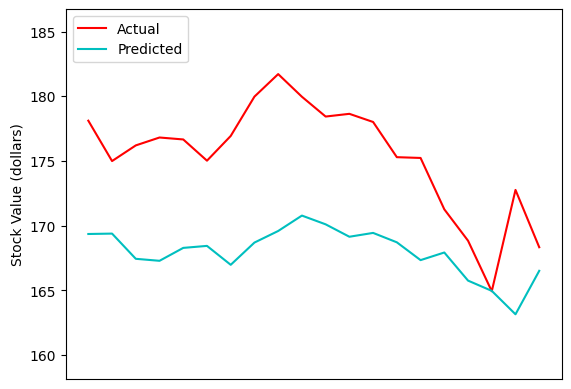

In [ ]:
fig, ax = plt.subplots()

ax.plot(actual_new[:,3], 'r-', label='Actual')
ax.plot(pred_new[:,3], 'c-', label='Predicted')

ax.set_ylabel('Stock Value (dollars)')

ax.set_ylim(min(min(actual_new[:,3]), min(pred_new[:,3])) - 5, max(max(actual_new[:,3]), max(pred_new[:,3])) + 5)
plt.xticks([])

ax.legend(loc='upper left')

plt.show()

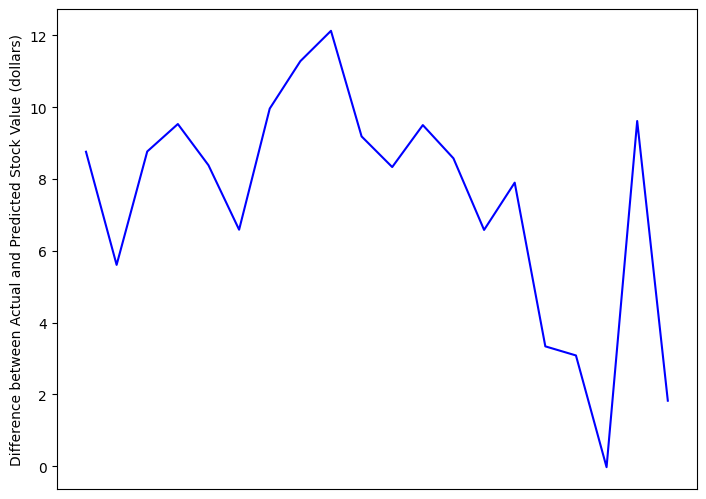

In [ ]:
difference = actual_new - pred_new
fig = plt.figure()
diffGraph = fig.add_axes([0,0,1,1])
diffGraph.plot(difference[:, 3], 'b')
diffGraph.set_ylabel('Difference between Actual and Predicted Stock Value (dollars)')
plt.xticks([])
plt.show()

In [ ]:
pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 52.4 MB/s eta 0:00:00


In [ ]:
import dash
from dash import dcc, html
import plotly.graph_objs as go
import numpy as np
import torch
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# (Your trained model import here)
# from your_project import model, scaler


In [ ]:
# Assuming you have already defined your model, loss function, and optimizer

epochs = 5
for i in range(epochs):
    epoch_loss = 0
    for seq, labels in train:
        seq = torch.from_numpy(np.array(seq)).type(torch.FloatTensor)
        labels = torch.from_numpy(np.array(labels)).type(torch.FloatTensor)

        optimizer.zero_grad()  # Cleartorch.save(model, 'model.pth')  # Save the trained model to a file
 previous gradients

        y_pred = model(seq)  # Forward pass

        labels = labels.view(1)  # Reshape labels to match predictions

        single_loss = loss_function(y_pred, labels)  # Calculate loss
        single_loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        epoch_loss += single_loss.item()

    average_loss = epoch_loss / len(train)  # Average loss for the epoch
    print(f'epoch: {i+1:3} loss: {average_loss:.10f}')



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)

In [ ]:
torch.save(model, 'model.pth')  # Save the trained model to a file


In [ ]:
model = torch.load('model.pth')  # Load the trained model


In [ ]:
# Load the dataset (or replace it with real-time data source)
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/g5XM0-gTrOquyZcBxcJAfw/StockData.csv")
scaler = MinMaxScaler(feature_range=(-1, 1))

# Load your trained model (ensure the model is saved in a .pt or .pkl file)
model = torch.load('model.pth')  # Use your saved model here

# Normalize data for the LSTM model
price = df[['High', 'Low', 'Open', 'Close']]
price_scaled = scaler.fit_transform(price.values)


In [ ]:
app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Stock Price Prediction Dashboard'),

    dcc.Graph(
        id='prediction-graph',
        figure={}
    ),

    html.Button('Predict Next Value', id='predict-button', n_clicks=0)
])


In [ ]:
from dash.dependencies import Input, Output

@app.callback(
    Output('prediction-graph', 'figure'),
    [Input('predict-button', 'n_clicks')]
)
def update_graph(n_clicks):
    # Make prediction for the next value using the model
    model.eval()

    actual = df['Close'].values[-20:]  # Last 20 days actual data for comparison
    pred = []  # Store predictions

    with torch.no_grad():
        for seq in price_scaled[-20:]:
            seq = torch.tensor(seq, dtype=torch.float32).unsqueeze(0)
            prediction = model(seq)
            pred.append(prediction.item())

    pred_unscaled = scaler.inverse_transform(np.array(pred).reshape(-1, 1))  # Inverse scaling

    # Create the figure for the graph
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=np.arange(len(actual)), y=actual, mode='lines', name='Actual'))
    fig.add_trace(go.Scatter(x=np.arange(len(pred_unscaled)), y=pred_unscaled.flatten(), mode='lines', name='Predicted'))

    fig.update_layout(title='Stock Price Prediction', xaxis_title='Days', yaxis_title='Price')
    return fig


In [ ]:
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

SyntaxError: invalid syntax (<ipython-input-38-3daaf932acd7>, line 1)